<center><h1>Bài thực hành 11. LÀM QUEN VỚI MẠNG NEURAL CƠ BẢN</h1></center>
<br>
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Artificial-Intelligence-Neural-Network-Nodes.jpg" alt="neural network">
<br>
<h3>Mô hình mạng neural trong hình trên có những loại layer:</h3>
<h4>Input Layer</h4>
<h4>Hidden Layer</h4>
<h4>Output Layer</h4>



<h2> 1. LOAD DỮ LIỆU</h2>

In [100]:
from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test)=load_data()

##### (?) MNIST là viết tắt của cụm từ nào?
>Modified National Institute of Standards and Technology

<h2> 2. CHUẨN BỊ DỮ LIỆU

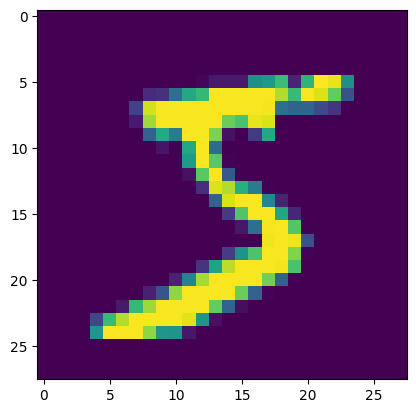

In [101]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])



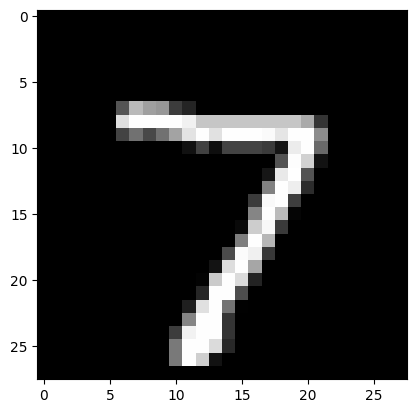

In [102]:
plt.imshow(X_test[0], cmap='gray')
plt.show()


In [103]:
X_train.shape

(60000, 28, 28)

In [104]:
X_train[0].shape

(28, 28)

In [105]:
X_test.shape

(10000, 28, 28)

In [106]:
X_test[0].shape

(28, 28)

In [107]:
y_test.shape

(10000,)

In [108]:
y_train.shape

(60000,)

### (?) Hãy khảo sát bộ dữ liệu MNIST do thư viện Keras cung cấp:
- Xác định số lượng ảnh của tập train và tập test?
>Tập train có 60000 ảnh<br>
>Tập test có 10000 ảnh
- Tính tỉ lệ train : test?
>Tỉ lệ train : test là 6:1
- Xác định kích thước của mỗi ảnh trong tập train và tập test?
>Kích thước mỗi ảnh là 28x28

In [109]:
label_list=dict()

for i in range(0, 9+1):
  label_list[i]=list(y_train).count(i)

### (?) Xác định số lượng nhãn và liệt kê các nhãn có trong tập train?
>Có 10 nhãn đánh số từ 0 - 9, các nhãn có trong tập train được liệt kê bên dưới.

In [110]:
label_list

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

###**(?) Sử dụng thư viện Matplotlib để vẽ các biểu đồ sau:**

<function matplotlib.pyplot.show(close=None, block=None)>

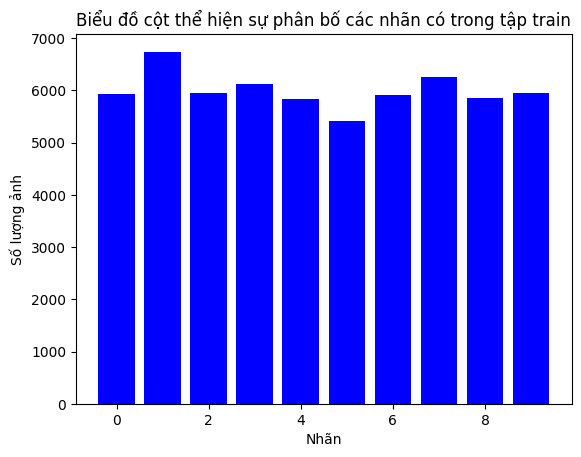

In [111]:
plt.bar(label_list.keys(), label_list.values(), color='blue')
plt.title('Biểu đồ cột thể hiện sự phân bố các nhãn có trong tập train')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng ảnh')
plt.show

####*Biểu đồ cột thể hiện sự phân bố các nhãn có trong tập train*

<function matplotlib.pyplot.show(close=None, block=None)>

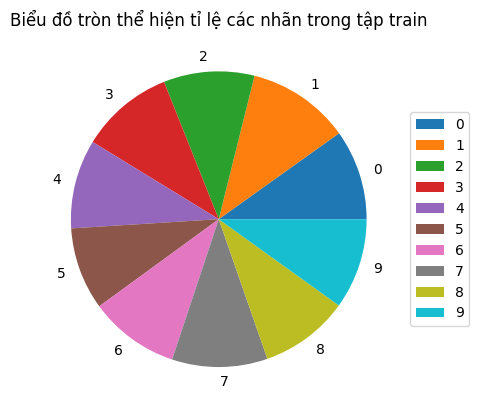

In [112]:
plt.pie( label_list.values(),labels=label_list.keys())
plt.title('Biểu đồ tròn thể hiện tỉ lệ các nhãn trong tập train')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

####*Biểu đồ tròn thể hiện tỉ lệ các nhãn có trong tập train*

In [113]:
X_train_reshaped = X_train.reshape(-1, 784)

###(?) Sau khi thực hiện thao tác reshape trên tập train:
- Mỗi điểm dữ liệu là một vector có số chiều là bao nhiêu?
>Mỗi điểm dữ liệu là một vector có số chiều là: 784
-Các số -1 và 784 có ý nghĩa gì?
>Tham số -1 được sử dụng cho số lượng hàng, nghĩa là số lượng mẫu đào tạo không thay đổi sau khi reshape.\
>Số 784 là số lượng cột mới, tức là số lượng đặc trưng cho mỗi mẫu sau khi đã được làm phẳng.
-Viết ra dạng của input X = …?
>input X = (60000, 784)

In [114]:
X_train_reshaped.shape

(60000, 784)

###Tương tự, thực hiện thao tác reshape cho tập test.

In [115]:
X_test_reshaped = X_test.reshape(-1, 784)

In [116]:
X_test_reshaped.shape

(10000, 784)

###**(?) Điền từ hoặc số thích hợp vào chỗ trống trong những câu dưới đây:**

>Đầu ra của dữ liệu sẽ có từ 0 -> 9 tương ứng với 10 chữ số viết tay\
>Mỗi điểm dữ liệu được phân loại vào 1 trong 10 lớp tương ứng \
>Đây là bài toán multiclass classification

In [117]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [118]:
y_train.shape


(60000, 10)

In [119]:
y_train[5].shape

(10,)

###**(?) Sau khi thực hiện thao tác trên:**
- Xác định kích thước của y_train?
>y_train có kích thước ban đầu là (60000,).


- Các số liệu này tương ứng với những đại
lượng nào?
>Số 60000 thể hiện số lượng mẫu.
>Số 10 thể hiện số lượng lớp (num_classes).
-  Viết ra vector tương ứng y_train[5]?
>y_train[5] có dạng là [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
- Các giá trị “1” và “0” trong mỗi vector có ý nghĩa gì?
>Giá trị "1" ở vị trí i thể hiện rằng mẫu tương ứng thuộc vào lớp i.\
>Giá trị "0" ở tất cả các vị trí khác thể hiện rằng mẫu không thuộc vào các lớp đó.


<h2> 3. XÂY DỰNG MẠNG NEURAL BẰNG KERAS

### 1. Kể tên và ghi công thức của một số hàm kích hoạt mà em biết?
> ReLU (Rectified Linear Unit): $f(x) = \max(0, x)$\
> Sigmoid: $f(x) = \frac{1}{1 + e^{-x}}$\
>Tanh (tang hyperbolic): $f(x) = \tanh(x)$\
>Softmax:  $f(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

In [120]:
from keras.models import Sequential
model = Sequential()

In [121]:
from keras.layers import Dense

model.add(Dense(784, input_shape=(784,)))

In [122]:
  model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
Total params: 615440 (2.35 MB)
Trainable params: 615440 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model.add(Dense(10, input_shape=(784, )))

### 2. Xác định kích thước đầu ra (output_shape) của lớp được thêm vào mô hình?
   > Output_shape sẽ là (10,).

### 3. Tại sao số units ở lớp này lại là 10?
>có 10 chữ số từ 0 đến 9, vì vậy số units là 10.




### 4. Tổng xác suất của các lớp bằng bao nhiêu?
> Tổng xác suất bằng 1


In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model.output.shape

TensorShape([None, 10])

### 5. Hai layers trong mô hình trên tương ứng với những loại layer nào trong mô hình mạng neural tổng quát?
 > Dense layers, layer đầu tiên có 784 units và thứ hai có 10 units, là các lớp fully connected layers. có tổng cộng 615440 tham số




<h2> 4. HUẤN LUYỆN MÔ HÌNH

In [126]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)

In [127]:
from tensorflow.keras.losses import BinaryCrossentropy
loss = BinaryCrossentropy()

In [130]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

###(?) Vì sao cần set giá trị learning_rate nhỏ?
>Vì nó ảnh hưởng đến tốc độ học của mô hình. Learning_rate nhỏ, mô hình có xu hướng hội tụ ổn định hơn, nghĩa là giảm thiểu hàm mất mát một cách chắc chắn hơn.

###Viết công thức tính loss Cross Entropy cho bài toán phân lớp nhị phân “cat vs .non-cat” với hai nhãn là y = 1 (cat) và y = 0 (non-cat) (Chú thích các đại lượng trong công thức)?
>Binary Cross Entropy Loss : $$
L_{bce} = -\frac{1}{m} \sum_{i=1}^m y_i \log(p_i) + (1-y_i) \log(1-p_i)
$$


In [131]:
import time

# Ghi lại thời điểm bắt đầu huấn luyện
start_time = time.time()

# Tiến hành huấn luyện mô hình
model.fit(X_train_reshaped, y_train, batch_size=128, epochs=10)

# Tính thời gian huấn luyện
end_time = time.time()
training_time = end_time - start_time

# In ra thời gian huấn luyện
print(f"Thời gian huấn luyện: {training_time} giây")


Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 8/10
469/469 [==============================] - 7s 16ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 2.7472 - accuracy: 0.1044
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 2.7472 - accura

>Vậy thời gian huấn luyện mô hình là: 82.66 giây.

<h2> 5. ĐÁNH GIÁ MÔ HÌNH


In [132]:
y_pred = model.predict(X_test_reshaped)

313/313 [==============================] - 1s 4ms/step


In [133]:
y_pred.shape

(10000, 10)

In [134]:
y_test.shape

(10000,)

###**(?) Kết quả dự đoán của mô hình sẽ là một ma trận có kích thước a x b.**
- Hãy xác định các giá trị a, b?
>a=10000\
>b=10
- Nêu ý nghĩa của các giá trị a, b?
>a là số lượng mẫu trong tập test.\
>b là số lượng lớp của mô hình.

In [135]:
import numpy as np
y_pred_label = np.argmax(y_pred, axis=-1)

In [136]:
from sklearn.metrics import accuracy_score
print(f"Accuracy cua mo hinh la: {accuracy_score(y_test, y_pred_label)*100}%")

Accuracy cua mo hinh la: 10.280000000000001%


<h2> 6. LƯU MÔ HÌNH


In [137]:
model.save('my_model.keras')

###(?) Việc lưu lại mô hình có tác dụng gì?

- Tái sử dụng mô hình: Bạn có thể sử dụng mô hình đã được huấn luyện cho các ứng dụng khác mà không cần phải huấn luyện lại từ đầu. Điều này tiết kiệm thời gian và nguồn lực tính toán.
- Deployai mô hình: Mô hình cần được lưu lại để triển khai trong các ứng dụng thực tế. Sau khi huấn luyện, bạn có thể tính toán dự đoán cho các dữ liệu mới mà không cần phải tính toán lại từ đầu.

In [40]:
from keras.models import load_model
model = load_model('my_model.keras')
model.layers

<h2>7. MỘT SỐ THAO TÁC XỬ LÝ KHÁC VỚI MẠNG NEURAL

In [139]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###**(?) Sử dụng lệnh summary để xem cấu trúc của mô hình và cho biết kết quả?**

>Gồm hai lớp Dense:\
Denselayer đầu tiên có 784 units và thứ hai có 10 units, là các lớp fully connected layers. có tổng cộng 623290 tham số


In [140]:
model.layers

In [143]:
layer_id = 1  # Thay thế số này bằng chỉ số lớp bạn quan tâm
layer = model.get_layer(index=layer_id)


In [144]:
# Xem tham số của mô hình
model_params = model.weights
# Hoặc
model_params = model.get_weights()

# Xem tham số của một lớp
layer_params = model.layers[layer_id].weights
# Hoặc
layer_params = model.layers[layer_id].get_weights()


In [145]:
model.pop()


In [146]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
Total params: 615440 (2.35 MB)
Trainable params: 615440 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###(?) Sử dụng lệnh summary để xem cấu trúc của mô hình và cho biết kết quả?

>Dense layer có 784 units, là lớp fully connected layers. có tổng cộng 615440 tham số

In [147]:
del model


<h2>8. BÀI TẬP

<h3>Bài tập 1

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential()
model_1.add(Dense(784, input_shape=(784, ), activation='sigmoid'))

In [149]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
Total params: 615440 (2.35 MB)
Trainable params: 615440 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
model_1.add(Dense(10, input_shape=(784, ), activation='sigmoid'))

In [151]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
optimizer_1 = Adam(learning_rate=0.01)
loss_1 = BinaryCrossentropy()
model_1.compile(optimizer=optimizer_1, loss=loss_1, metrics=['accuracy'])

In [153]:
model_1.fit(X_train_reshaped, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1269 - accuracy: 0.7976
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1060 - accuracy: 0.8320
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0966 - accuracy: 0.8475
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0982 - accuracy: 0.8430
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0903 - accuracy: 0.8559
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0899 - accuracy: 0.8572
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0909 - accuracy: 0.8547
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0949 - accuracy: 0.8467
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0882 - accuracy: 0.8631
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0822 - accura

In [154]:
y_pred_1 = model_1.predict(X_test_reshaped)
y_pred_new = np.argmax(y_pred_1, axis=-1)

313/313 [==============================] - 4s 10ms/step


In [155]:
print(f"Accuracy cua mo hinh su dung softmax la: {accuracy_score(y_test, y_pred_new)*100}%")

Accuracy cua mo hinh su dung softmax la: 87.26%


<h3> Bài tập 2

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_2 = Sequential()
model_2.add(Dense(784, input_shape=(784, ), activation='relu'))
model_2.add(Dense(10, input_shape=(784, ), activation='sigmoid'))
model_2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
optimizer_2 = Adam(learning_rate=0.01)
loss_2 = BinaryCrossentropy()
model_2.compile(optimizer=optimizer_2, loss=loss_2, metrics=['accuracy'])

In [158]:
model_2.fit(X_train_reshaped, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 2.4616 - accuracy: 0.8902
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0447 - accuracy: 0.9423
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0392 - accuracy: 0.9492
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0395 - accuracy: 0.9499
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0422 - accuracy: 0.9476
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0427 - accuracy: 0.9450
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0471 - accuracy: 0.9399
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0643 - accuracy: 0.9167
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0693 - accuracy: 0.9027
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0812 - accur

In [159]:
y_pred_2 = model_2.predict(X_test_reshaped)
y_pred_2 = np.argmax(y_pred_2, axis=-1)

score_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy cua mo hinh su dung softmax va ReLU la: {score_2*100}%")

313/313 [==============================] - 1s 3ms/step
Accuracy cua mo hinh su dung softmax va ReLU la: 82.89%


<h3>Bài tập 3

In [160]:

X_train_new = X_train / 255.0
X_test_new = X_test / 255.0
X_train_new.shape

(60000, 28, 28)

In [161]:
X_train_new_reshape = X_train_new.reshape(-1, 784)
X_test_new_reshape = X_test_new.reshape(-1, 784)


In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_3 = Sequential()
model_3.add(Dense(784, input_shape=(784, ), activation='relu'))
model_3.add(Dense(10, input_shape=(784, ), activation='sigmoid'))
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 784)               615440    
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
optimizer_3 = Adam(learning_rate=0.01)
loss_3 = BinaryCrossentropy()
model_3.compile(optimizer=optimizer_3, loss=loss_3, metrics=['accuracy'])

In [164]:
model_3.fit(X_train_new_reshape, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.0434 - accuracy: 0.9360
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0194 - accuracy: 0.9729
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0147 - accuracy: 0.9805
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0130 - accuracy: 0.9842
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0110 - accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0099 - accuracy: 0.9887
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0089 - accuracy: 0.9905
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0085 - accuracy: 0.9912
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0076 - accuracy: 0.9926
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0070 - accura

In [165]:
y_pred_3 = model_3.predict(X_test_new_reshape)
y_pred_3 = np.argmax(y_pred_3, axis=-1)

score_normalized = accuracy_score(y_test, y_pred_3)
print(f"Accuracy cua mo hinh sau khi chuan hoa la: {score_normalized*100}%")

313/313 [==============================] - 2s 5ms/step
Accuracy cua mo hinh sau khi chuan hoa la: 97.95%


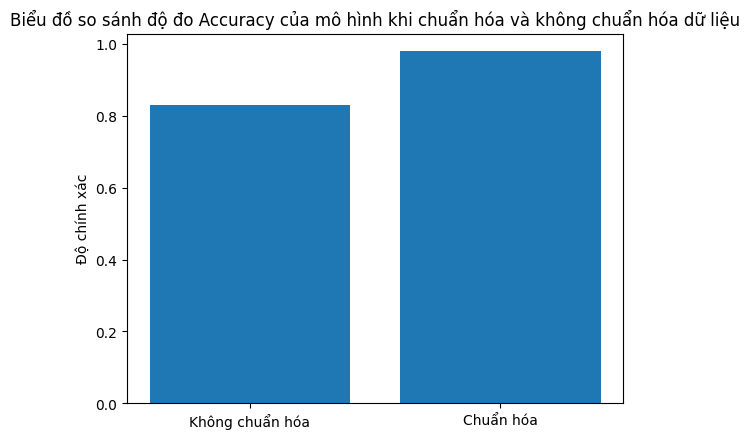

In [166]:
plt.bar(['Không chuẩn hóa','Chuẩn hóa'],[score_2,score_normalized])
plt.ylabel('Độ chính xác')
plt.title("Biểu đồ so sánh độ đo Accuracy của mô hình khi chuẩn hóa và không chuẩn hóa dữ liệu")
plt.show()

>Như vậy, Aaccuracy của mô hình khi chuẩn hoá (97.95%) cao hơn khi không chuẩn hoá dữ liệu.

<hr>
<center>HẾT
<hr>